## The one-hidden-layer neural network outperformed logistic regression (70% accuracy), but accuracy remains below the required level. 


In [1]:
import numpy as np
import h5py 
import sys
sys.path.append("../src")
from NN_1_hidden_layer_02.NN_1_hidden_layer_model import *

In [2]:
with h5py.File("../EIDSeg_Dataset/cache/eidseg_64x64_binary_any.h5", "r") as f:
    X_train_org = f["X_train"][:]
    Y_train_org = f["Y_train"][:]
    X_test_org  = f["X_test"][:]
    Y_test_org  = f["Y_test"][:]

m_train = X_train_org.shape[0]
m_test = X_test_org.shape[0]
num_px =X_train_org.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_org.shape))
print ("train_set_y shape: " + str(Y_train_org.shape))
print ("test_set_x shape: " + str(X_test_org.shape))
print ("test_set_y shape: " + str(Y_test_org.shape))

Number of training examples: m_train = 2612
Number of testing examples: m_test = 327
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (2612, 64, 64, 3)
train_set_y shape: (1, 2612)
test_set_x shape: (327, 64, 64, 3)
test_set_y shape: (1, 327)


In [3]:
with h5py.File("../EIDSeg_Dataset/cache//eidseg_64x64_binary_any_flat.h5", "r") as f:
    train_x = f["train_x"][:]   # (12288, m)
    train_y = f["train_y"][:]   # (1, m)
    test_x  = f["test_x"][:]    # (12288, m)
    test_y  = f["test_y"][:]    # (1, m)

print ("train_set_x flatten shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x flatten shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

train_set_x flatten shape: (12288, 2612)
train_set_y shape: (1, 2612)
test_set_x flatten shape: (12288, 327)
test_set_y shape: (1, 327)


## nn_model

In [4]:

def nn_model(X_train, Y_train, n_h=128, num_iterations = 10000, learning_rate=0.001, print_cost=False, X_test=None, Y_test=None):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    #np.random.seed(3)
    n_x = layer_sizes(X_train, Y_train)[0]
    n_y = layer_sizes(X_train, Y_train)[2]
    
    (n_x, n_h, n_y) = layer_sizes(X_train, Y_train)
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []


    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X_train, parameters)

        cost = compute_cost(A2, Y_train)
        
        grads = backward_propagation(parameters, cache, X_train, Y_train)

        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 500 iterations
        if print_cost and (i % 500 == 0):
            msg = f"Cost after iteration {i}: {cost:.6f}"
            if X_test is not None and Y_test is not None:
                train_pred = predict(parameters, X_train)
                train_acc = accuracy(train_pred, Y_train)
                msg += f" | train acc: {train_acc:.2f}%"
            print(msg)
    if X_test is not None and Y_test is not None:
        train_pred = predict(parameters, X_train)
        test_pred = predict(parameters, X_test)
        train_acc = accuracy(train_pred, Y_train)
        test_acc = accuracy(test_pred, Y_test)
        print(f"Final train accuracy: {train_acc:.2f}%")
        print(f"Final test accuracy:  {test_acc:.2f}%")

    return parameters, costs

In [5]:
params, costs = nn_model(train_x, Y_train_org,
                  n_h=128,
                  num_iterations=3500,
                  learning_rate=0.008,
                  print_cost=True,
                  X_test=test_x,
                  Y_test=Y_test_org)

Cost after iteration 0: 0.693071 | train acc: 70.71%
Cost after iteration 500: 0.617860 | train acc: 70.71%
Cost after iteration 1000: 0.606876 | train acc: 70.71%
Cost after iteration 1500: 0.605093 | train acc: 70.71%
Cost after iteration 2000: 0.604788 | train acc: 70.71%
Cost after iteration 2500: 0.604734 | train acc: 70.71%
Cost after iteration 3000: 0.604723 | train acc: 70.71%
Final train accuracy: 70.71%
Final test accuracy:  74.01%


# Clearly it can't learn more than that 

=== Model Evaluation Report ===


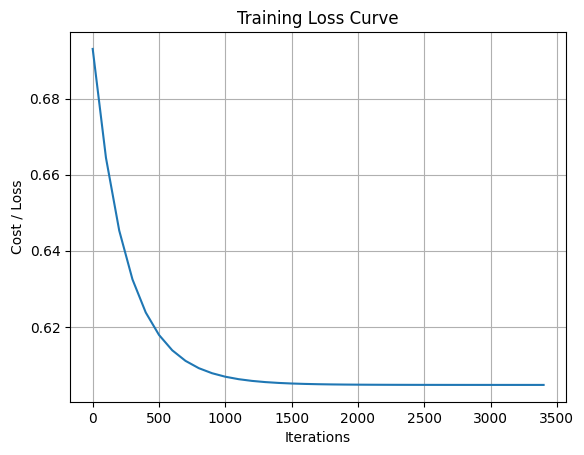

In [6]:
from eval_utils import *
from visualization import *

print_report(params)
plot_costs(costs)